# Previous Application File Analysis

## Data Reading and summary

In [1]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#To display maximum rows and columns for better readability

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [4]:
previous=pd.read_csv(r'F:\Credit_EDA\previous_application.csv')

In [5]:
previous.shape

(1670214, 37)

In [6]:
#Finding the percentage of NULL values in all  the columns:

previous.isnull().sum()/len(previous)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

## Data Cleaning

In [7]:
#Removing all the columns where missing value percentage is more than 40%

Null_perc = previous.isnull().sum()/len(previous)*100

Null_columns=Null_perc[Null_perc>40]

previous.drop(Null_columns.index.to_list(),axis=1,inplace=True)

In [8]:
#Checking if the null columns are dropped

previous.isnull().sum()/len(previous)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [9]:
#Fixing the negative values of Days columns

previous['DAYS_DECISION']=previous['DAYS_DECISION'].apply(lambda x: abs(x))

## Data Analysing and Visualisation

In [10]:
#Checking the data imbalance

previous['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

### Categorical Univariate analysis 

In [11]:
#Creating font variables to be used for Titles and Labels

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

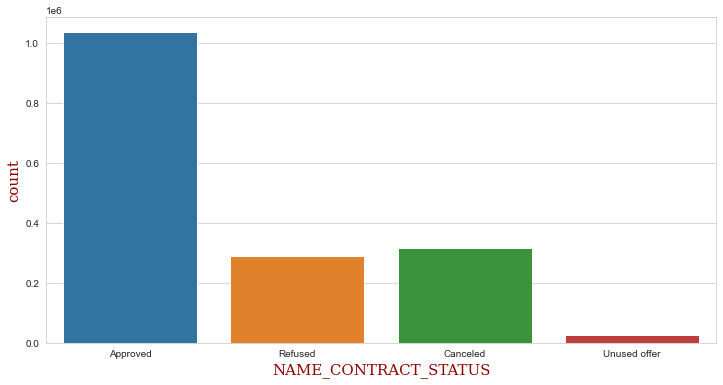

In [12]:
#Visualizing NAME_CONTRACT_STATUS

sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plt.xlabel("NAME_CONTRACT_STATUS",fontdict = font2)
plt.ylabel("Count",fontdict = font2)
sns.countplot(previous.NAME_CONTRACT_STATUS, data=previous)
plt.show()

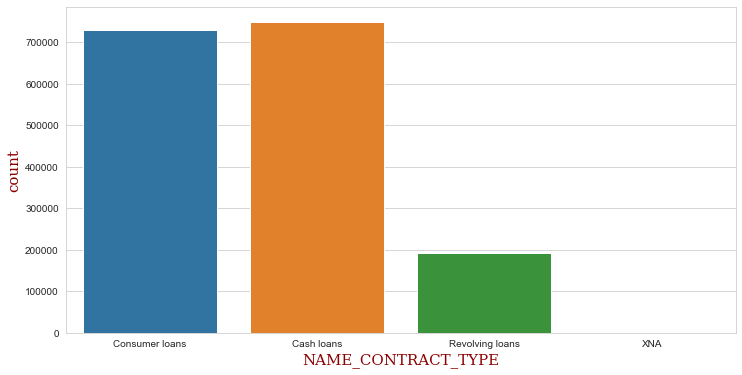

In [13]:
#Visualizing NAME_CONTRACT_TYPE 

sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plt.xlabel("NAME_CONTRACT_TYPE",fontdict = font2)
plt.ylabel("Count",fontdict = font2)
sns.countplot(previous.NAME_CONTRACT_TYPE, data=previous)
plt.show()

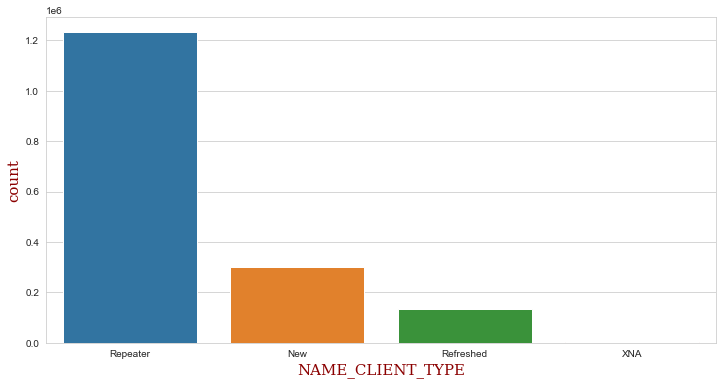

In [14]:
#Visualizing NAME_CLIENT_TYPE 

sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plt.xlabel("NAME_CLIENT_TYPE",fontdict = font2)
plt.ylabel("Count",fontdict = font2)
sns.countplot(previous.NAME_CLIENT_TYPE, data=previous)
plt.show()

### Numerical Univariate analysis

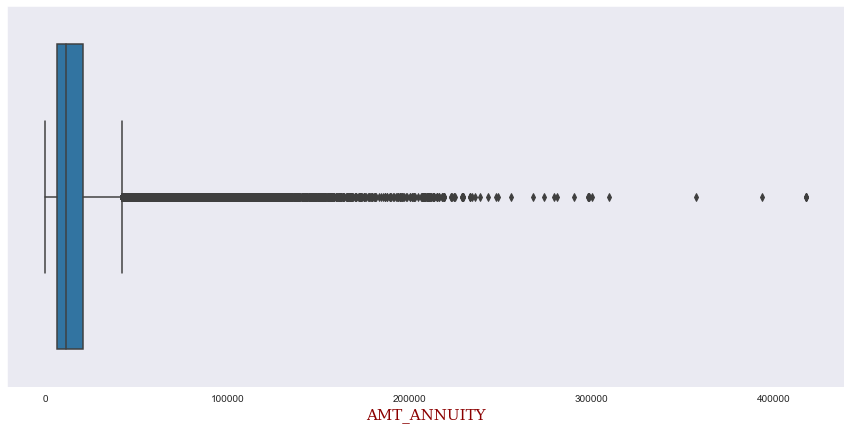

In [15]:
#Visualizing AMT_ANNUITY

sns.set_style('dark')
plt.figure(figsize=(15,7))
plt.xlabel("AMT_ANNUITY",fontdict = font2)
sns.boxplot(previous['AMT_ANNUITY'])
plt.show()

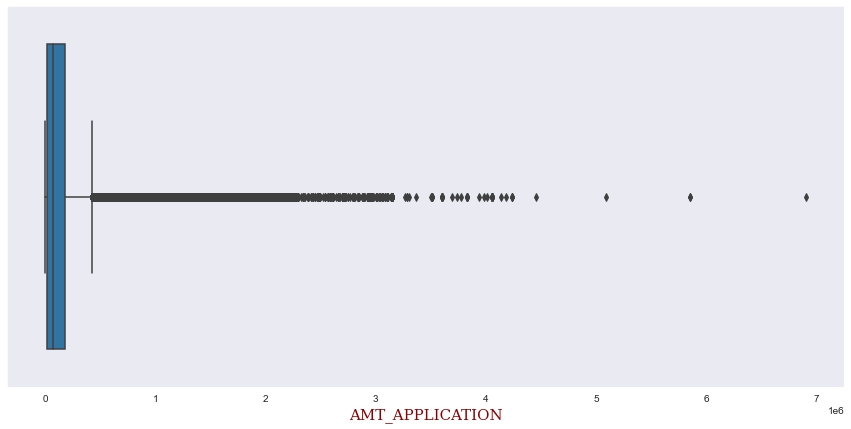

In [16]:
#Visualizing AMT_APPLICATION

sns.set_style('dark')
plt.figure(figsize=(15,7))
plt.xlabel("AMT_APPLICATION",fontdict = font2)
sns.boxplot(previous['AMT_APPLICATION'])
plt.show()

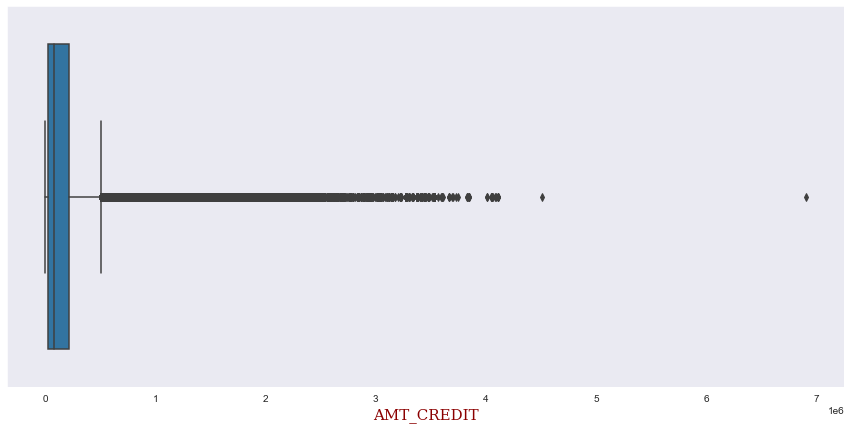

In [17]:
#Visualizing AMT_CREDIT

sns.set_style('dark')
plt.figure(figsize=(15,7))
plt.xlabel("AMT_CREDIT",fontdict = font2)
sns.boxplot(previous['AMT_CREDIT'])
plt.show()

### Correlation for continuos variables

In [18]:
# Correlation for variables
corr_previous = previous[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE']].corr()
#corr_target1_df = corr_target1.corr()
corr_previous   

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE
AMT_ANNUITY,1.000000,0.808872,0.816429,0.820895
AMT_APPLICATION,0.808872,1.000000,0.975824,0.999884
AMT_CREDIT,0.816429,0.975824,1.000000,0.993087
AMT_GOODS_PRICE,0.820895,0.999884,0.993087,1.000000


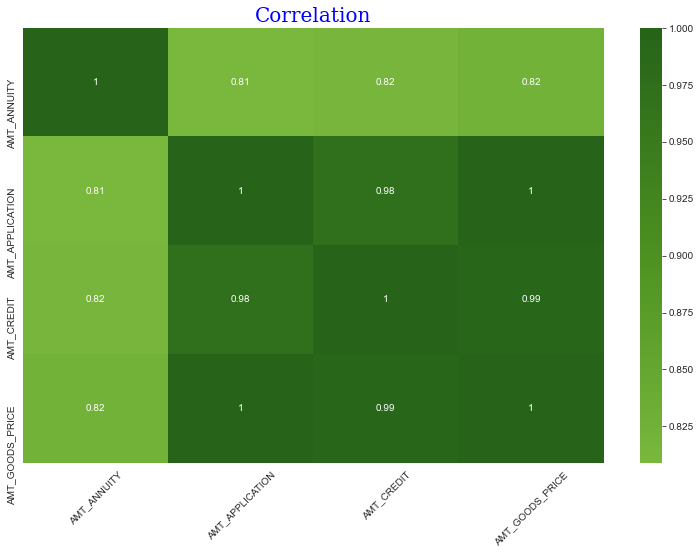

In [19]:
#Generating heatmap to visualise the correlation

sns.set_style('whitegrid')
plt.figure(figsize=(13,8))
plt.xticks(rotation=45)
plt.title('Correlation', fontdict=font1)
sns.heatmap(corr_previous,center=0.5,cmap='PiYG', annot=True)
plt.show()

### Bivariate Analysis

#### Categorical vs Categorical

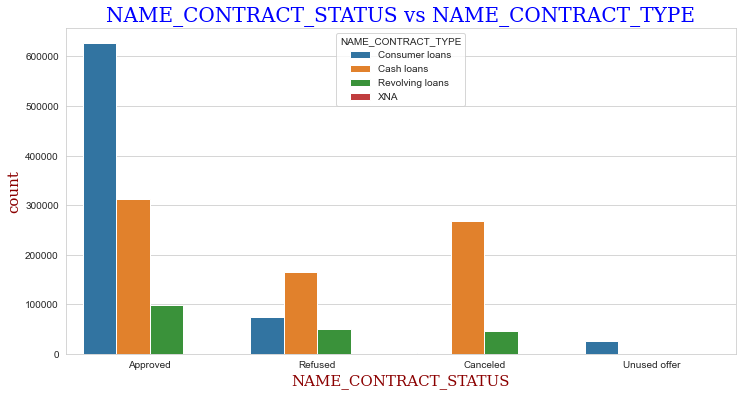

In [20]:
#NAME_CONTRACT_STATUS vs NAME_CONTRACT_TYPE

sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plt.title("NAME_CONTRACT_STATUS vs NAME_CONTRACT_TYPE", fontdict=font1)
plt.xlabel("NAME_CONTRACT_STATUS",fontdict = font2)
plt.ylabel("COUNT",fontdict = font2)
sns.countplot(previous.NAME_CONTRACT_STATUS, hue=previous.NAME_CONTRACT_TYPE,data=previous)
plt.show()

#### Categorical vs Numerical

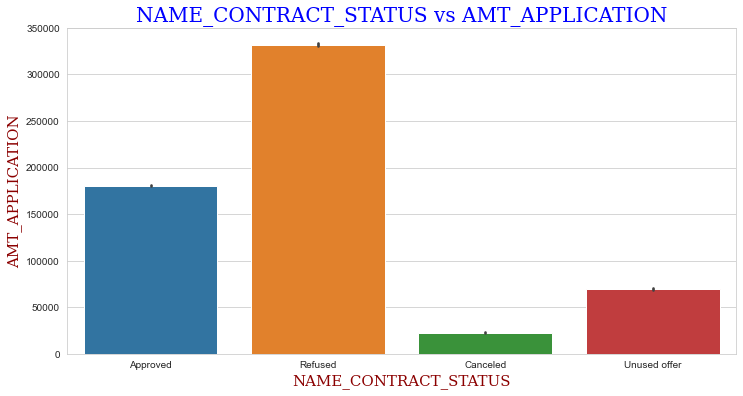

In [21]:
#NAME_CONTRACT_STATUS vs AMT_APPLICATION

sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plt.title("NAME_CONTRACT_STATUS vs AMT_APPLICATION", fontdict=font1)
plt.xlabel("NAME_CONTRACT_STATUS",fontdict = font2)
plt.ylabel("AMT_APPLICATION",fontdict = font2)
sns.barplot(x=previous.NAME_CONTRACT_STATUS, y=previous.AMT_APPLICATION,data=previous)
plt.show()

#### Categorical vs Numerical

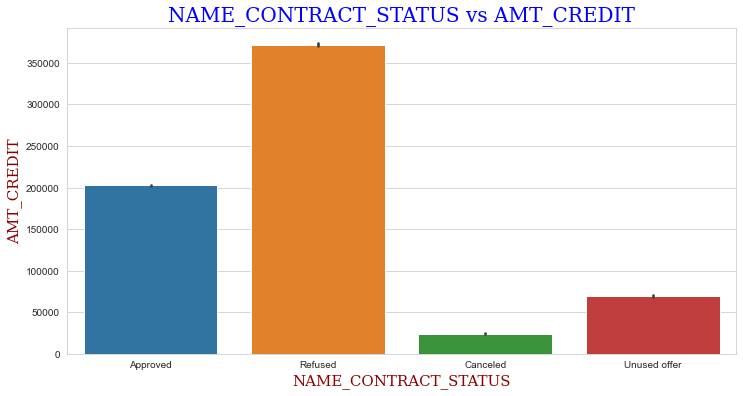

In [22]:
#NAME_CONTRACT_STATUS vs AMT_CREDIT

sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plt.title("NAME_CONTRACT_STATUS vs AMT_CREDIT", fontdict=font1)
plt.xlabel("NAME_CONTRACT_STATUS",fontdict = font2)
plt.ylabel("AMT_CREDIT",fontdict = font2)
sns.barplot(x=previous.NAME_CONTRACT_STATUS, y=previous.AMT_CREDIT,data=previous)
plt.show()

#### Numerical vs Numerical

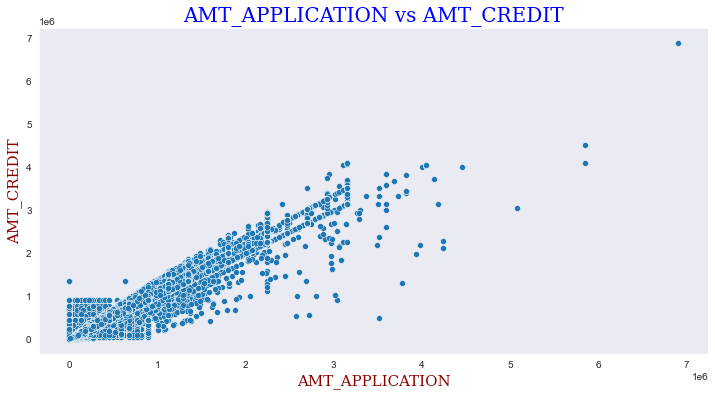

In [23]:
#AMT_APPLICATION vs AMT_CREDITAMT_CREDIT

sns.set_style('dark')
plt.figure(figsize=(12,6))
plt.title("AMT_APPLICATION vs AMT_CREDIT", fontdict=font1)
plt.xlabel("AMT_APPLICATION",fontdict = font2)
plt.ylabel("AMT_CREDIT",fontdict = font2)
sns.scatterplot(x=previous.AMT_APPLICATION, y=previous.AMT_CREDIT,data=previous)
plt.show()


### Conclusion:

#####  •Approved loans are higher compared to other counterparts.
##### •Cash Loans are preferred more than other contract types closely followed by consumer loans.
##### •Repeater applications are higher in comparison to new applications
##### •Amount credit and amount application has higher co-relation(0.98).
##### •Consumer Loans are more in approved category. Cash loans are refused and cancelled more.
##### •High value of amount applied for loans have been refused.
##### •High value of amount credit for loans have been refused.